In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [16,8]

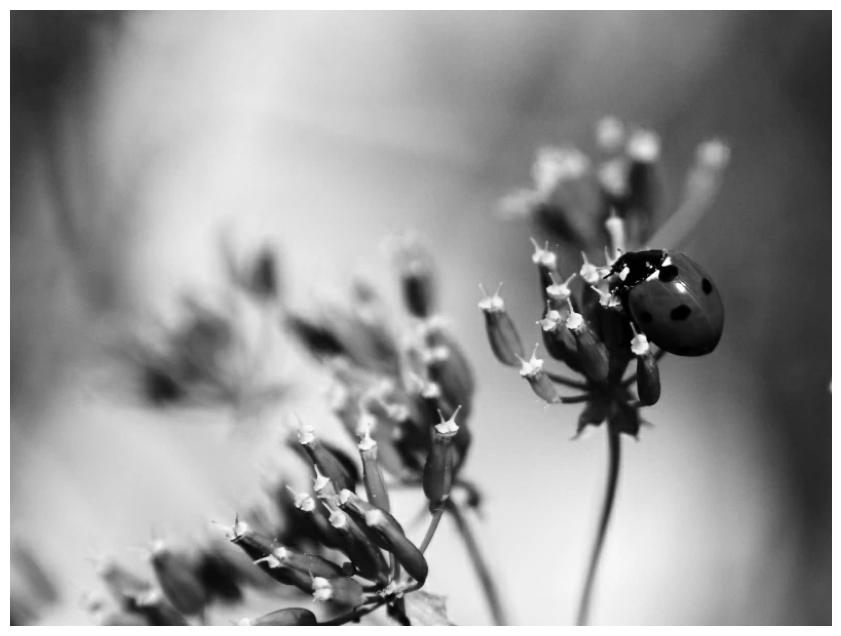

In [2]:
A = imread('4.webp')
X = np.mean(A,-1) # convert RGB to grayscale

#img = plt.imshow(256-X)
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

(600,)


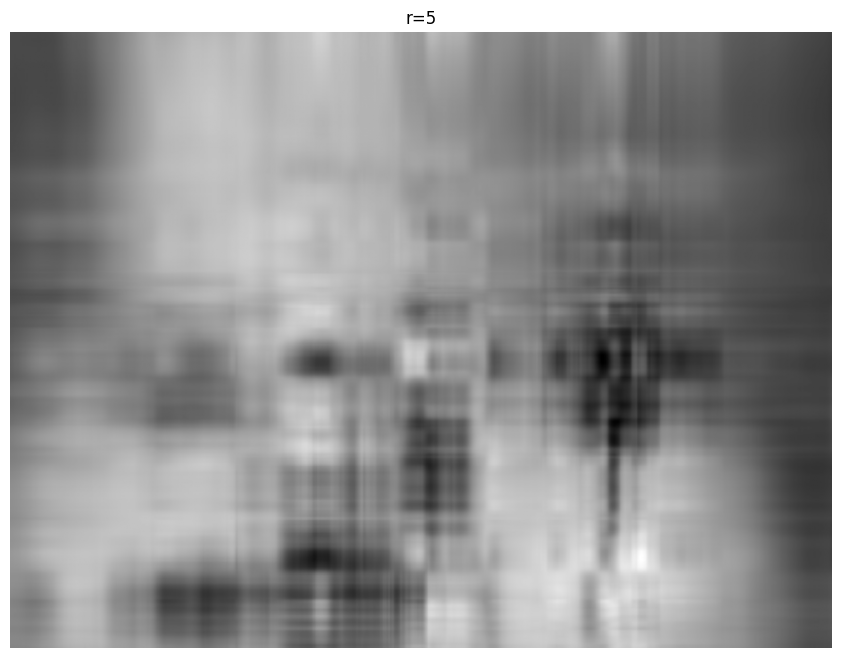

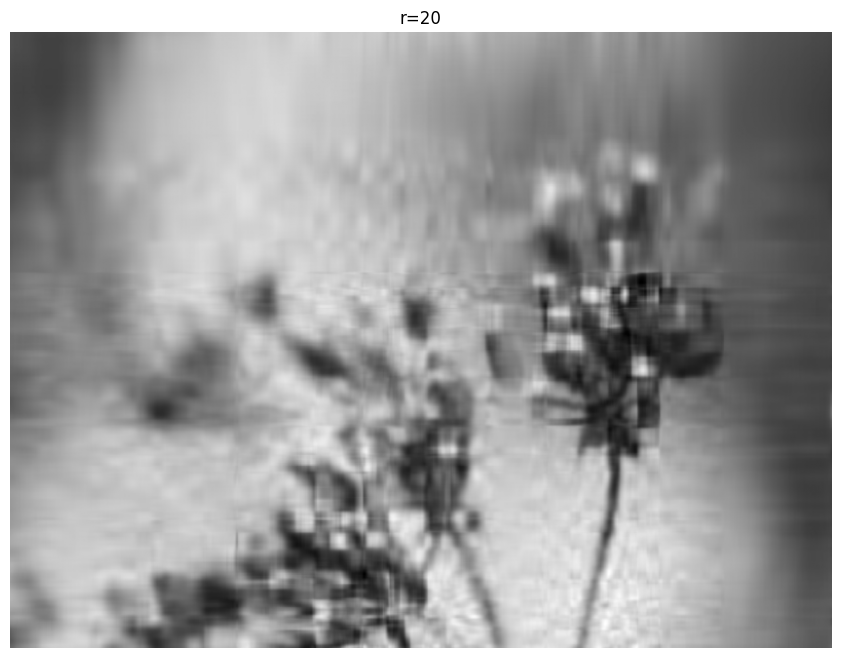

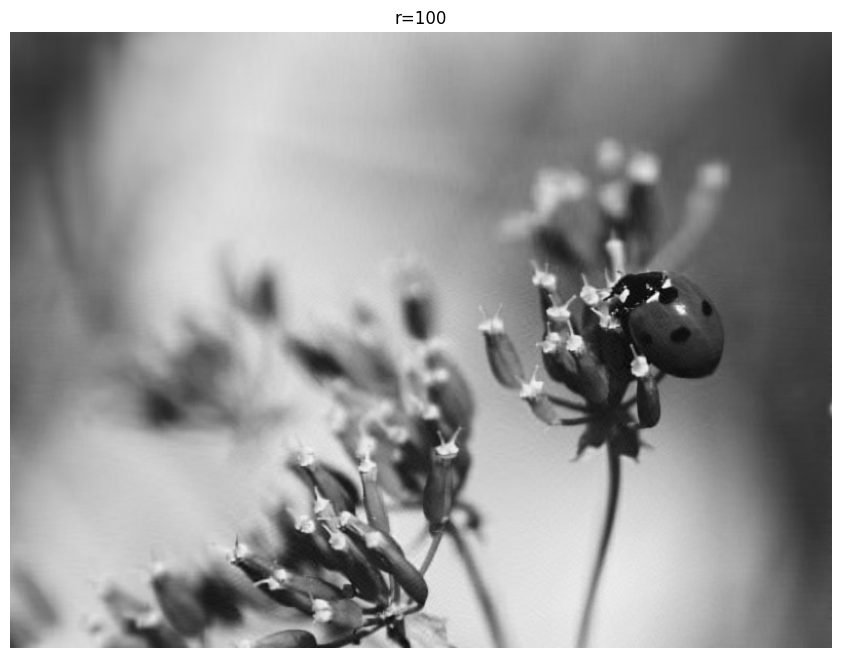

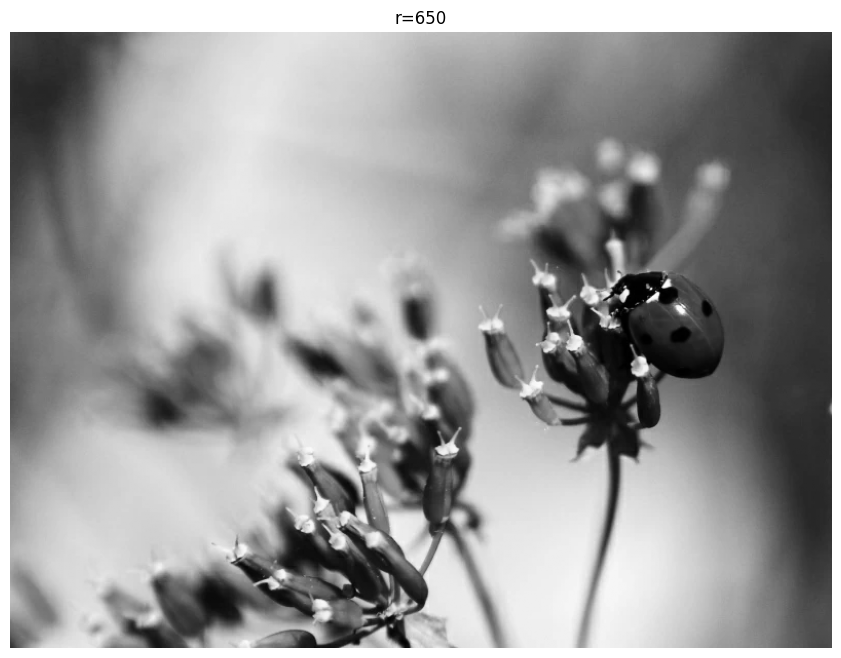

In [3]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
print(S.shape)
S = np.diag(S)

j=0
for r in (5,20,100,650):
    # Construct approximate image
    Xapprox = U[:,:r]@S[0:r,:r]@VT[:r,:]
    plt.figure(j+1)
    j += 1
    #img = plt.imshow(256-Xapprox)
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r='+str(r))
    plt.show()

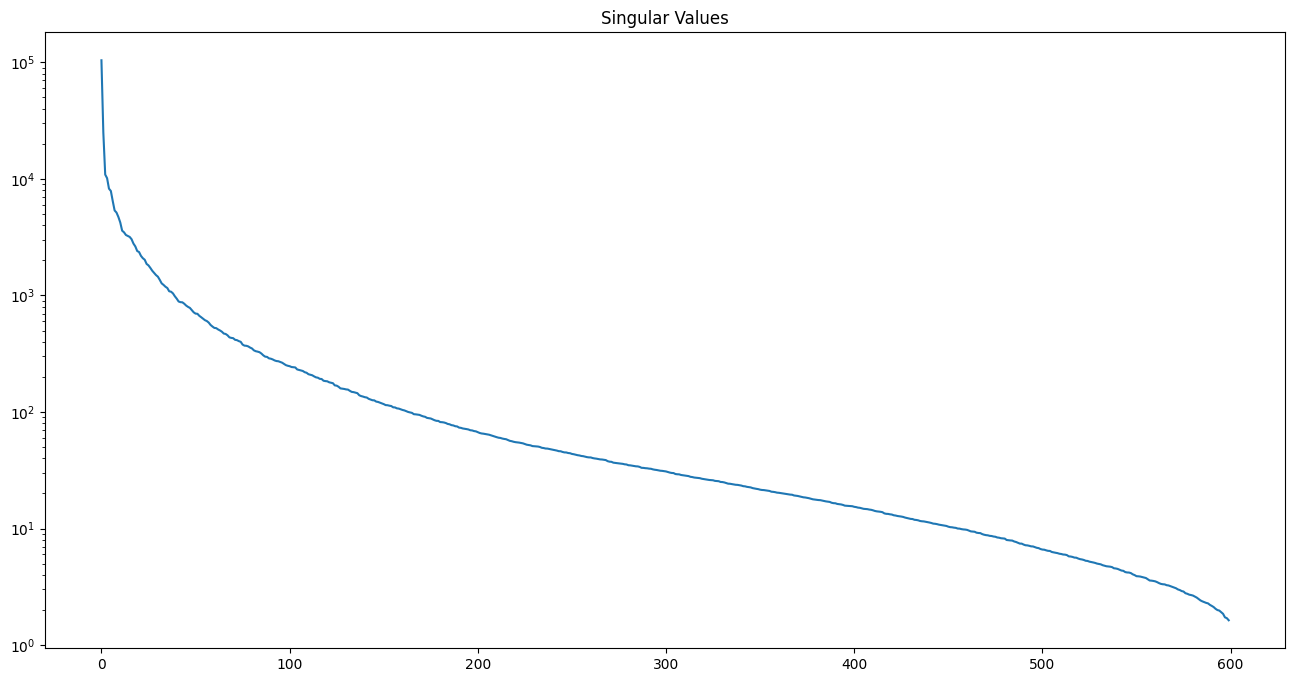

In [4]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()


In [5]:
if S.ndim == 2:
    s = np.diag(S)
else:
    s = S
cum_energy = np.cumsum(s**2)
total = cum_energy[-1]
r = np.argmax(cum_energy / total >= 0.9) + 1
print("Minimalne r dla 90% energii:", r)


Minimalne r dla 90% energii: 2
